# Import libraries

In [25]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Using pandas to read dataset

In [26]:
iris = pd.read_csv('/Users/aviratbelekar/Desktop/spring/ml/Assignment/iris.csv')

# Encode categorical values into numerical values 

In [27]:
def encode_category(x):
    if x == "Iris-setosa":
        return 0;
    elif x == "Iris-versicolor":
        return 1
    elif x == "Iris-virginica":
        return 2
iris["species_category"] = iris["species"].apply(encode_category)
del iris["species"]

In [28]:
iris['Setosa'] = 0
iris['Versicolor'] = 0
iris['Virginica'] = 0
labels = iris["species_category"] == 0
iris.loc[labels,'Setosa'] = 1
labels_v = iris["species_category"] == 1
iris.loc[labels_v,'Versicolor'] = 1
labels_vir = iris['species_category'] == 2
iris.loc[labels_vir,'Virginica'] = 1

# Normalise dataset using minmax scalar

In [29]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["species_category"]=dataset["species_category"]
    return dataNorm
iris = normalize(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,species_category,Setosa,Versicolor,Virginica
0,0.222222,0.625000,0.067797,0.041667,0,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,0,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,0,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,0,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,0,1.0,0.0,0.0
5,0.305556,0.791667,0.118644,0.125000,0,1.0,0.0,0.0
6,0.083333,0.583333,0.067797,0.083333,0,1.0,0.0,0.0
7,0.194444,0.583333,0.084746,0.041667,0,1.0,0.0,0.0
8,0.027778,0.375000,0.067797,0.041667,0,1.0,0.0,0.0
9,0.166667,0.458333,0.084746,0.000000,0,1.0,0.0,0.0


# Split into train and testing with training as 80% and testing as 20%

In [30]:
iris = iris.sample(frac=1).reset_index(drop=True)
train_data = iris.iloc[:120]
test_data = iris.iloc[120:]
train_features = train_data.loc[:,train_data.columns!='species_category']
train_target = train_data[['species_category']]
test_features = test_data.loc[:,train_data.columns!='species_category']
test_target = test_data[['species_category']]

# Defining softmax, sigmoid function 

In [31]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Generate random functions

In [32]:
def generate_randomWeights():
    w1 = np.random.randn(4,6)
    w2 = np.random.randn(6,3)
    return w1,w2

# Implement feed forward

In [33]:
def feed_forward_sigmoid(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = sigmoid(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o

# Implement back propogation

In [34]:
def back_propagate_sigmoid(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo

# Decode numerical values back to categorical values

In [35]:
def decode_category(x):
    if x == 0:
        return "Setosa";
    elif x == 1:
        return "Versicolor"
    elif x == 2:
        return "Virginica"
test_data["species_category"] = test_data["species_category"].apply(decode_category)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Create the model using 1 hidden layer and sigmoid activation function 

In [36]:
features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_sigmoid,w2_sigmoid = generate_randomWeights()
error_cost_sigmoid = []
learning_rate_sigmoid = 0.01
for i in range(0,500):
    z2_sigmoid,a2_sigmoid,z3_sigmoid,o_sigmoid = feed_forward_sigmoid(train_features[features_after_addition],w1_sigmoid,w2_sigmoid)
    djdw1_sigmoid, djdw2_sigmoid = back_propagate_sigmoid(train_features, o_sigmoid ,z2_sigmoid, z3_sigmoid, a2_sigmoid, w2_sigmoid)
    loss_sigmoid = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_sigmoid)).sum(axis=1)/len(train_features))
    error_cost_sigmoid.append(loss_sigmoid)
    w1_sigmoid = w1_sigmoid-learning_rate_sigmoid*djdw1_sigmoid
    w2_sigmoid = w2_sigmoid-learning_rate_sigmoid*djdw2_sigmoid
print(pd.DataFrame(error_cost_sigmoid))

            0
0    2.468236
1    2.055521
2    1.757569
3    1.575294
4    1.458840
5    1.368529
6    1.292931
7    1.228880
8    1.174378
9    1.127643
10   1.087090
11   1.051376
12   1.019417
13   0.990364
14   0.963574
15   0.938567
16   0.914991
17   0.892594
18   0.871199
19   0.850682
20   0.830960
21   0.811982
22   0.793712
23   0.776133
24   0.759232
25   0.743003
26   0.727440
27   0.712539
28   0.698293
29   0.684692
..        ...
470  0.195974
471  0.195758
472  0.195544
473  0.195330
474  0.195117
475  0.194905
476  0.194694
477  0.194484
478  0.194274
479  0.194065
480  0.193857
481  0.193649
482  0.193443
483  0.193237
484  0.193032
485  0.192827
486  0.192624
487  0.192421
488  0.192219
489  0.192017
490  0.191816
491  0.191616
492  0.191417
493  0.191218
494  0.191021
495  0.190823
496  0.190627
497  0.190431
498  0.190236
499  0.190042

[500 rows x 1 columns]


# Test the data with the model

In [37]:
z2_sigmoid,a2_sigmoid,z3_sigmoid,o_test_sigmoid = feed_forward_sigmoid(test_features[features_after_addition],w1_sigmoid,w2_sigmoid)
o_test_sigmoid['Maximum'] = o_test_sigmoid[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_sigmoid['Actual_Output'] = test_data['species_category']
o_test_sigmoid

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
120,0.014063,0.697161,2.887759e-01,Versicolor,Versicolor
121,0.005009,0.922370,7.262074e-02,Versicolor,Versicolor
122,0.988761,0.011239,1.679355e-07,Setosa,Setosa
123,0.004347,0.812507,1.831461e-01,Versicolor,Versicolor
124,0.002506,0.202926,7.945677e-01,Virginica,Virginica
125,0.983767,0.016232,4.012852e-07,Setosa,Setosa
126,0.003062,0.382366,6.145718e-01,Virginica,Virginica
127,0.000833,0.097733,9.014337e-01,Virginica,Virginica
128,0.008791,0.725096,2.661129e-01,Versicolor,Versicolor
129,0.000733,0.181238,8.180289e-01,Virginica,Virginica


# Iteration vs Cost Graph for Neural Newtork for multiclass Classification using Softmax and Sigmoid in hidden layer

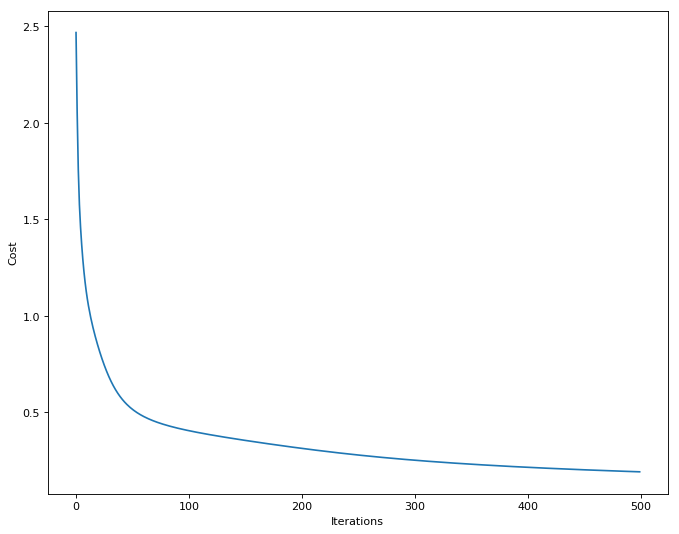

In [38]:
itr = np.arange(0,len(error_cost_sigmoid))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_sigmoid)

# Accuracy 

In [39]:
from sklearn.metrics import accuracy_score
score_sigmoid = accuracy_score(o_test_sigmoid['Maximum'],o_test_sigmoid['Actual_Output'])*100
print("Accuracy For Sigmoid: ", score_sigmoid, "%")

Accuracy For Sigmoid:  100.0 %


# F1 Score

In [40]:
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'], average='macro')*100,"%")

F1 Score is  100.0 %


# Confusion matrix

In [41]:
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'])
print(confusion)

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
